In [1]:
# Melakukan import library yang dibutuhkan
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Baca file Excel dengan menggunakan pandas
data = pd.read_excel("data_input/dataset_task+5.xlsx", sheet_name=None)

# Buat koneksi ke database SQLite
conn = sqlite3.connect("nama_database.db")
cursor = conn.cursor()

# Loop melalui setiap sheet di Excel dan simpan ke tabel SQL
for sheet_name, data_frame in data.items():
    # Simpan data frame ke tabel dalam database SQLite
    data_frame.to_sql(sheet_name, conn, if_exists="replace", index=False)

In [3]:
# Eksekusi pernyataan SQL untuk mendapatkan daftar tabel
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Ambil hasil dan cetak daftar tabel
tables = cursor.fetchall()
for table in tables:
    print(table[0])

product category
dataset_task 5
orders
product_category
dataset_task_5
customers


-----------------------------------------------------------------------------------------------------------------

Disini saya melakukan read data menggunakan pd.read_sql_query untuk membuat dataframe baru dan membuat primary key agar bisa saling berelasi dengan opsi lain. Saya membuatnya dengan metode pandas untuk pembuatan primary key agar bisa di merge (Saling berelasi nantinya) untuk dibuatkan table_master(Hasil tabel akhir dari 4 dataset SQL tadi).

# Membuat primary key tabel customer

In [4]:
customers = pd.read_sql_query("SELECT * FROM customers", conn)
customers

,CustomerID,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,CustomerCity,CustomerState,CustomerZip
0,1,Grazia,Rasmus,grasmusas@i2i.jp#mailto:grasmusas@i2i.jp#,(202) 577-2595,628 Buhler Junction,Washington,District of Columbia,20029
1,2,Bunny,Trevan,btrevanmj@wordpress.org#mailto:btrevanmj@wordp...,917-903-2827,52 Cascade Drive,Jamaica,New York,11436
2,3,Tracie,Grayston,tgrayston7k@pagesperso-orange.fr#mailto:tgrays...,404-868-2391,672 Comanche Way,Atlanta,Georgia,30343
3,4,Amerigo,Garrelts,agarrelts6e@oaic.gov.au#mailto:agarrelts6e@oai...,415-190-3290,8252 Village Green Hill,San Francisco,California,94177
4,5,Shea,Stronghill,sstronghillc1@google.nl#mailto:sstronghillc1@g...,432-775-7828,542 3rd Point,Midland,Texas,79705
...,...,...,...,...,...,...,...,...,...
2118,2119,Tedman,Stockings,tstockings94@opera.com#mailto:tstockings94@ope...,810-434-7886,406 Rigney Drive,Flint,Michigan,48550
2119,2120,Jackie,Johnes,jjohnesgq@ca.gov#mailto:jjohnesgq@ca.gov#,941-491-1065,19 Sunnyside Trail,North Port,Florida,34290
2120,2121,Dorella,Saxton,dsaxton96@cornell.edu#mailto:dsaxton96@cornell...,404-165-3184,48 Prairieview Crossing,Duluth,Georgia,30096
2121,2122,Rubia,Theuff,rtheuffem@sfgate.com#mailto:rtheuffem@sfgate.com#,814-232-6220,70 Vernon Junction,Erie,Pennsylvania,16522


In [5]:
# Mengatur CustomerID sebagai primary key
customers.set_index("CustomerID", inplace = True)

In [6]:
customers.head()

,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,CustomerCity,CustomerState,CustomerZip
CustomerID,,,,,,,,
1,Grazia,Rasmus,grasmusas@i2i.jp#mailto:grasmusas@i2i.jp#,(202) 577-2595,628 Buhler Junction,Washington,District of Columbia,20029
2,Bunny,Trevan,btrevanmj@wordpress.org#mailto:btrevanmj@wordp...,917-903-2827,52 Cascade Drive,Jamaica,New York,11436
3,Tracie,Grayston,tgrayston7k@pagesperso-orange.fr#mailto:tgrays...,404-868-2391,672 Comanche Way,Atlanta,Georgia,30343
4,Amerigo,Garrelts,agarrelts6e@oaic.gov.au#mailto:agarrelts6e@oai...,415-190-3290,8252 Village Green Hill,San Francisco,California,94177
5,Shea,Stronghill,sstronghillc1@google.nl#mailto:sstronghillc1@g...,432-775-7828,542 3rd Point,Midland,Texas,79705


# Membuat primary key tabel ProdNumber

In [7]:
prod_number = pd.read_sql_query("SELECT * FROM dataset_task_5", conn)
prod_number

,ProdNumber,ProdName,Category,Price
0,BP101,All Eyes Drone Blueprint,1,9.99
1,BP102,Bsquare Robot Blueprint,1,8.99
2,BP104,Cat Robot Blueprint,1,4.99
3,BP105,Creature Robot Arms Blueprint,1,12.00
4,BP106,Hexacopter Drone Blueprint,1,8.99
...,...,...,...,...
65,TV809,Understanding 3D Printing,7,42.99
66,TV810,Understanding Automation,7,44.95
67,TV811,Understanding Drone Regulations,7,27.50
68,TV812,Understanding Raspberry PI,7,28.99


In [8]:
# Mengatur CustomerID sebagai primary key
prod_number.set_index("ProdNumber", inplace = True)

In [9]:
prod_number.head()

,ProdName,Category,Price
ProdNumber,,,
BP101,All Eyes Drone Blueprint,1,9.99
BP102,Bsquare Robot Blueprint,1,8.99
BP104,Cat Robot Blueprint,1,4.99
BP105,Creature Robot Arms Blueprint,1,12.00
BP106,Hexacopter Drone Blueprint,1,8.99


# Membuat primary key tabel Produk_Category

In [10]:
prod_cat = pd.read_sql_query("SELECT * FROM product_category", conn)
prod_cat

,CategoryID,CategoryName,CategoryAbbreviation
0,1,Blueprints,BP
1,2,Drone Kits,DK
2,3,Drones,DS
3,4,eBooks,EB
4,5,Robot Kits,RK
5,6,Robots,RS
6,7,Training Videos,TV


In [11]:
# Mengatur CustomerID sebagai primary key
prod_cat.set_index("CategoryID", inplace = True)

In [12]:
prod_cat.head()

,CategoryName,CategoryAbbreviation
CategoryID,,
1,Blueprints,BP
2,Drone Kits,DK
3,Drones,DS
4,eBooks,EB
5,Robot Kits,RK


# Membuat primary key tabel Orders

In [13]:
orders = pd.read_sql_query("SELECT * FROM orders", conn)
orders

,OrderID,Date,CustomerID,ProdNumber,Quantity
0,1,2020-01-01 00:00:00,1866,EB514,2
1,2,2020-01-01 00:00:00,1567,RS706,3
2,3,2020-01-01 00:00:00,2064,TV804,6
3,4,2020-01-01 00:00:00,287,DK203,1
4,5,2020-01-01 00:00:00,422,EB517,5
...,...,...,...,...,...
3334,3335,2021-12-31 00:00:00,410,TV810,2
3335,3336,2021-12-31 00:00:00,520,RS707,5
3336,3337,2021-12-31 00:00:00,582,RK602,4
3337,3338,2021-12-31 00:00:00,1225,TV810,5


In [14]:
# Mengatur CustomerID sebagai primary key
orders.set_index("OrderID", inplace = True)

In [15]:
orders.head()

,Date,CustomerID,ProdNumber,Quantity
OrderID,,,,
1,2020-01-01 00:00:00,1866,EB514,2
2,2020-01-01 00:00:00,1567,RS706,3
3,2020-01-01 00:00:00,2064,TV804,6
4,2020-01-01 00:00:00,287,DK203,1
5,2020-01-01 00:00:00,422,EB517,5


# Melakukan merge untuk setiap tabel yang telah dibuat

Selanjutnya saya melakukan merge agar mendapatkan table master

In [16]:
# Relasikan tabel orders dengan customers berdasarkan kolom CustomerID
orders_customers = orders.merge(customers, on='CustomerID', how='inner')

# Relasikan tabel orders_customers dengan prod_number berdasarkan kolom ProdNumber
orders_customers_prod = orders_customers.merge(prod_number, on='ProdNumber', how='inner')

# Relasikan tabel orders_customers_prod dengan prod_cat berdasarkan kolom Category
orders_customers_prod_cat = orders_customers_prod.merge(prod_cat, left_on='Category', right_on='CategoryID', how='inner')

# menyimpannya ke table master
tabel_master = orders_customers_prod_cat

# Tampilkan hasil relasi
print(tabel_master)

                     Date  CustomerID ProdNumber  Quantity  FirstName  \
0     2020-01-01 00:00:00        1866      EB514         2    Farrand   
1     2020-01-12 00:00:00          46      EB514         4       Dill   
2     2020-01-13 00:00:00        1101      EB514         1      Lotti   
3     2020-01-15 00:00:00         700      EB514         3    Roobbie   
4     2021-01-16 00:00:00        1052      EB514         2        Row   
...                   ...         ...        ...       ...        ...   
3334  2021-06-01 00:00:00        1836      DS303         1        Dre   
3335  2021-06-28 00:00:00         625      DS303         5   Robinett   
3336  2021-06-30 00:00:00        1244      DS303         6  Stanfield   
3337  2021-07-05 00:00:00         506      DS303         5      Alena   
3338  2021-10-30 00:00:00        1448      DS303         2     Elston   

          LastName                                      CustomerEmail  \
0           Vasler  fvaslerqt@comsenz.com#mailto:f

# Melihat hasil akhir dari table master

In [17]:
tabel_master

,Date,CustomerID,ProdNumber,Quantity,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,CustomerCity,CustomerState,CustomerZip,ProdName,Category,Price,CategoryName,CategoryAbbreviation
0,2020-01-01 00:00:00,1866,EB514,2,Farrand,Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,134 Melrose Pass,Jackson,Mississippi,39216,Polar Robots,4,23.99,eBooks,EB
1,2020-01-12 00:00:00,46,EB514,4,Dill,Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,771 Corry Court,Tulsa,Oklahoma,74116,Polar Robots,4,23.99,eBooks,EB
2,2020-01-13 00:00:00,1101,EB514,1,Lotti,Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,30 Rieder Avenue,Springfield,Illinois,62723,Polar Robots,4,23.99,eBooks,EB
3,2020-01-15 00:00:00,700,EB514,3,Roobbie,Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,5977 Bunker Hill Crossing,Washington,District of Columbia,20029,Polar Robots,4,23.99,eBooks,EB
4,2021-01-16 00:00:00,1052,EB514,2,Row,Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,91 Ilene Pass,Irvine,California,92717,Polar Robots,4,23.99,eBooks,EB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,2021-06-01 00:00:00,1836,DS303,1,Dre,Donoher,ddonoherh2@joomla.org#mailto:ddonoherh2@joomla...,972-394-6649,21761 Village Center,Dallas,Texas,75226,DTD-7000 Drone,3,450.00,Drones,DS
3335,2021-06-28 00:00:00,625,DS303,5,Robinett,Cossum,rcossumba@devhub.com#mailto:rcossumba@devhub.com#,314-377-5588,226 Karstens Hill,Saint Louis,Missouri,63169,DTD-7000 Drone,3,450.00,Drones,DS
3336,2021-06-30 00:00:00,1244,DS303,6,Stanfield,Weall,sweallf8@infoseek.co.jp#mailto:sweallf8@infose...,952-136-0108,94 Killdeer Terrace,Young America,Minnesota,55573,DTD-7000 Drone,3,450.00,Drones,DS
3337,2021-07-05 00:00:00,506,DS303,5,Alena,Kuhle,akuhlen2@abc.net.au#mailto:akuhlen2@abc.net.au#,719-233-6001,7026 Arizona Street,Colorado Springs,Colorado,80940,DTD-7000 Drone,3,450.00,Drones,DS


# Proses EDA

In [18]:
tabel_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339 entries, 0 to 3338
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3339 non-null   object 
 1   CustomerID            3339 non-null   int64  
 2   ProdNumber            3339 non-null   object 
 3   Quantity              3339 non-null   int64  
 4   FirstName             3339 non-null   object 
 5   LastName              3339 non-null   object 
 6   CustomerEmail         3339 non-null   object 
 7   CustomerPhone         3339 non-null   object 
 8   CustomerAddress       3339 non-null   object 
 9   CustomerCity          3339 non-null   object 
 10  CustomerState         3339 non-null   object 
 11  CustomerZip           3339 non-null   int64  
 12  ProdName              3339 non-null   object 
 13  Category              3339 non-null   int64  
 14  Price                 3339 non-null   float64
 15  CategoryName         

In [19]:
tabel_master["ProdName"].nunique()

69

In [20]:
# Mengubah tipe data yang sesuai

tabel_master["CustomerState"] = tabel_master["CustomerState"].astype("category")

tabel_master["ProdName"] = tabel_master["ProdName"].astype("category")

tabel_master["CategoryName"] = tabel_master["CategoryName"].astype("category")

In [21]:
tabel_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339 entries, 0 to 3338
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Date                  3339 non-null   object  
 1   CustomerID            3339 non-null   int64   
 2   ProdNumber            3339 non-null   object  
 3   Quantity              3339 non-null   int64   
 4   FirstName             3339 non-null   object  
 5   LastName              3339 non-null   object  
 6   CustomerEmail         3339 non-null   object  
 7   CustomerPhone         3339 non-null   object  
 8   CustomerAddress       3339 non-null   object  
 9   CustomerCity          3339 non-null   object  
 10  CustomerState         3339 non-null   category
 11  CustomerZip           3339 non-null   int64   
 12  ProdName              3339 non-null   category
 13  Category              3339 non-null   int64   
 14  Price                 3339 non-null   float64 
 15  Cate

In [22]:
# Menyatukan firstname dan lastname
tabel_master["Fullname"] = tabel_master["FirstName"] +" "+ tabel_master["LastName"]

In [23]:
# Menghapus kolom nama depan dan belakang
tabel_master = tabel_master.drop(["FirstName", "LastName"], axis=1)

In [24]:
#setelah dibuang, kembalikan menjadi tipe data datetime
tabel_master['Date'] = pd.to_datetime(tabel_master['Date'])

In [25]:
# Melihat missing value
tabel_master.isna().sum()

Date                    0
CustomerID              0
ProdNumber              0
Quantity                0
CustomerEmail           0
CustomerPhone           0
CustomerAddress         0
CustomerCity            0
CustomerState           0
CustomerZip             0
ProdName                0
Category                0
Price                   0
CategoryName            0
CategoryAbbreviation    0
Fullname                0
dtype: int64

In [26]:
tabel_master.head()

,Date,CustomerID,ProdNumber,Quantity,CustomerEmail,CustomerPhone,CustomerAddress,CustomerCity,CustomerState,CustomerZip,ProdName,Category,Price,CategoryName,CategoryAbbreviation,Fullname
0,2020-01-01,1866,EB514,2,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,134 Melrose Pass,Jackson,Mississippi,39216,Polar Robots,4,23.99,eBooks,EB,Farrand Vasler
1,2020-01-12,46,EB514,4,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,771 Corry Court,Tulsa,Oklahoma,74116,Polar Robots,4,23.99,eBooks,EB,Dill Gyrgorcewicx
2,2020-01-13,1101,EB514,1,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,30 Rieder Avenue,Springfield,Illinois,62723,Polar Robots,4,23.99,eBooks,EB,Lotti Cridlon
3,2020-01-15,700,EB514,3,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,5977 Bunker Hill Crossing,Washington,District of Columbia,20029,Polar Robots,4,23.99,eBooks,EB,Roobbie Dermot
4,2021-01-16,1052,EB514,2,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,91 Ilene Pass,Irvine,California,92717,Polar Robots,4,23.99,eBooks,EB,Row Hebner


# Data Wrangling

1. Sales Berdasarkan State

In [27]:
tabel_master["Total"] = tabel_master["Quantity"] * tabel_master["Price"]

In [28]:
rank_sales_state = tabel_master.pivot_table(
    index = "CustomerState",
    values = "Total",
    aggfunc = "sum"
).sort_values(by = "Total", ascending = True)

In [29]:
rank_sales_state.tail(10)

,Total
CustomerState,
Colorado,48942.05
Illinois,54648.29
District of Columbia,55381.94
Ohio,55575.49
Virginia,58312.21
Pennsylvania,61034.69
New York,93019.19
Florida,121018.31
Texas,196228.76


<AxesSubplot: ylabel='CustomerState'>

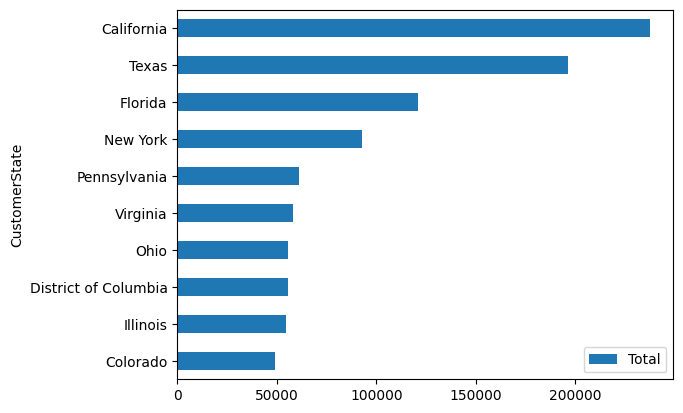

In [30]:
rank_sales_state.tail(10).plot(kind = "barh")

California memiliki tingkat penjualan yang sangat tinggi selama tahun 2021 dan 2022 yaitu sebanyak 237295.59

-------------------

2. Sales Product Berdasarkan Top 1 State(California)

In [32]:
# Mengquarterkan tahun
tabel_master["Quarter"] = tabel_master["Date"].dt.to_period("Q")

In [33]:
tabel_master['Date'] = pd.to_datetime(tabel_master['Date']).dt.date

In [34]:
# Membuat kolom year
tabel_master["Years"] = pd.to_datetime(tabel_master['Date']).dt.year

In [35]:
Total_per_quarter = pd.crosstab(
    index = tabel_master[tabel_master["CustomerState"] == "California"]["CategoryName"],
    columns = tabel_master[tabel_master["CustomerState"] == "California"]["Years"],
    values = tabel_master[tabel_master["CustomerState"] == "California"]["Total"],
    aggfunc = "sum"
)

In [36]:
# Mengurutkan DataFrame berdasarkan jumlah total per CategoryName secara menurun
Total_per_quarter_sorted = Total_per_quarter.sort_values(by=Total_per_quarter.columns[-1], ascending=True)

In [62]:
Total_per_quarter_sorted

Years,2020,2021
CategoryName,,
Blueprints,1214.14,1047.17
eBooks,3050.83,3934.71
Training Videos,3902.24,6629.55
Drone Kits,8037.80,6711.15
Robot Kits,12540.00,14103.00
Drones,33302.00,19481.00
Robots,58558.00,64784.00


<AxesSubplot: xlabel='CategoryName'>

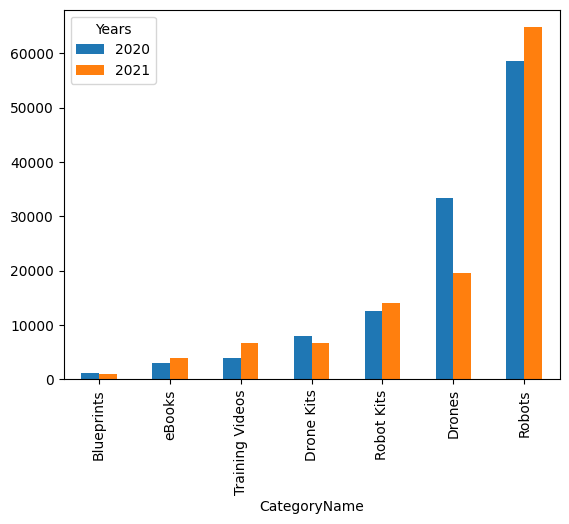

In [37]:
Total_per_quarter_sorted.plot(kind = "bar")

Ternyata dalam total penjualan terbesar di california didominasi oleh penjualan teknologi yaitu :
- Drones mendapatkan total sales sebanyak 33302.00(Tahun 2020) & 19481.00(Tahun 2021)
- Robots mendapatkan total sales sebanyak 58558.00(Tahun 2020) & 64784.00(Tahun 2021).

---------------------------------

3. Total Produk Yang terjual(Quantity) dalam keseluruhan State

In [71]:
Total_per_quantity = tabel_master.groupby("CategoryName").agg({"Quantity":"sum"})

In [73]:
Total_per_quantity = Total_per_quantity.sort_values(by="Quantity", ascending=False)

In [74]:
Total_per_quantity

,Quantity
CategoryName,
eBooks,3123
Training Videos,2081
Blueprints,1618
Drone Kits,1515
Drones,1227
Robots,1053
Robot Kits,1037


<AxesSubplot: xlabel='CategoryName'>

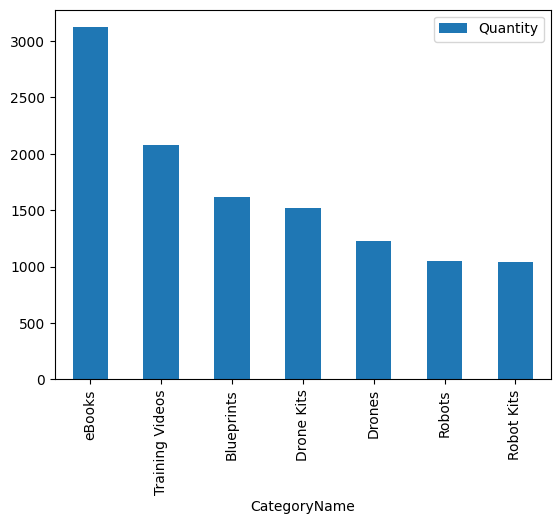

In [77]:
Total_per_quantity.plot(kind = "bar")

Pada penjualan seluruh produk di seluruh negara, ternyata konsumen lebih banyak yang berminat terhadap produk edukasi (ebooks, training videos dan blue print) ketimbang dengan produk teknologi.